In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from db_function import *

In [166]:
db=My_db(sqlite3.connect('insurance.db'))

In [167]:
ins=db.read_data('incomestatement')
ba=db.read_data('balancesheet')
cf=db.read_data('cashflow')

ins.index=pd.to_datetime(ins.index)
ba.index=pd.to_datetime(ba.index)
cf.index=pd.to_datetime(cf.index)

/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_15646/570707782.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ins.index=pd.to_datetime(ins.index)
/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_15646/570707782.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ba.index=pd.to_datetime(ba.index)
/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_15646/570707782.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cf.index=pd.to_datetime(cf.index)


In [168]:
ticker='PTI'

# Solvency ratio

Công thức cho non-life: Logarit tự nhiên của (Tổng tài sản - Tổng nợ)

Text(0.5, 1.0, 'PTI')

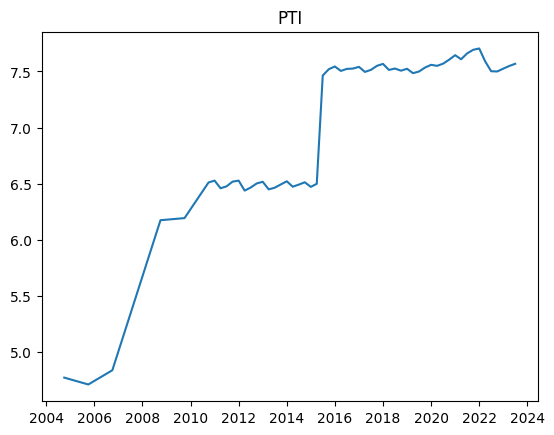

In [169]:
solvency_ratio =np.log(ba[ba['ticker']==ticker]['asset']-ba[ba['ticker']==ticker]['debt'])
plt.plot(solvency_ratio)
plt.title(ticker)

# Combined ratio

Chỉ tiêu tỷ lệ kết hợp (Combined ratio): Chỉ tiêu này đánh giá mức độ lãi/lỗ hoạt động kinh doanh bảo hiểm của doanh nghiệp.
- x = Tỷ lệ bồi thường (x1) + Tỷ lệ chi phí hoạt động kinh doanh bảo hiểm (x2)
    - Trong đó:
        - x1 =Tổng chi bồi thường bảo hiểm thuộc trách nhiệm giữ lại (A)/Doanh thu phí bảo hiểm thuần (B)
        - x2=Tổng chi phí hoạt động kinh doanh (C) / Doanh thu phí bảo hiểm thuần (B)


In [170]:
s6_21=db.read_data('s6_21')
s6_20=db.read_data('s6_20')
s6_19=db.read_data('s6_19')
s6_18=db.read_data('s6_18')
s6_17=db.read_data('s6_17')

In [171]:
s3_21=db.read_data('s3_21')
s3_20=db.read_data('s3_20')
s3_19=db.read_data('s3_19')
s3_18=db.read_data('s3_18')
s3_17=db.read_data('s3_17')

Tinh x1

In [172]:
s6_tick=pd.concat([s6_21[s6_21.index==ticker],
           s6_20[s6_20.index==ticker],
           s6_19[s6_19.index==ticker],
           s6_18[s6_18.index==ticker],
           s6_17[s6_17.index==ticker]])
s6_tick.index=[f'{i}-01-01' for i in range(2021,2016,-1)]

In [173]:
s3_tick=pd.concat([s3_21[s3_21.index==ticker],
           s3_20[s3_20.index==ticker],
           s3_19[s3_19.index==ticker],
           s3_18[s3_18.index==ticker],
           s3_17[s3_17.index==ticker]])
s3_tick.index=[f'{i}-01-01' for i in range(2021,2016,-1)]

In [174]:
x1=pd.DataFrame(index=s3_tick.index)
x1['A']=s6_tick['Bồi thường thuộc trách nhiệm giữ lại\nNet claims paid'].values
x1['B']=s3_tick['Doanh thu phí bảo hiểm gốc\nDirect premium\n'].values
def get_x1(df):
    return np.float(df['A'])/np.float(df['B'])
x1['res']=x1.apply(get_x1,axis=1)

/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_15646/2375720291.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(df['A'])/np.float(df['B'])


In [175]:
ins['year']=[i.year for i in ins.index]
x2=pd.DataFrame()
x2['C']=ins[ins['ticker']==ticker].groupby('year').sum()['operationExpense']

In [176]:
x2=x2[(x2.index<=2021)&(x2.index>=2017)].sort_index(ascending=False)
x2.index=x1.index
x2['res']=x2['C']/x1['B']

Text(0.5, 1.0, 'PTI')

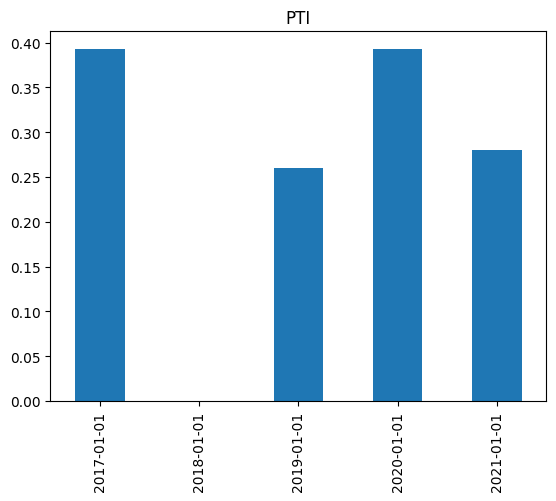

In [178]:
combined_ratio=((x1['res']+x2['res']).fillna(0))
combined_ratio.sort_index().plot(kind='bar')
plt.title(ticker)